In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Matplotlib is building the font cache; this may take a moment.


In [3]:
from js import fetch
import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
print (boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

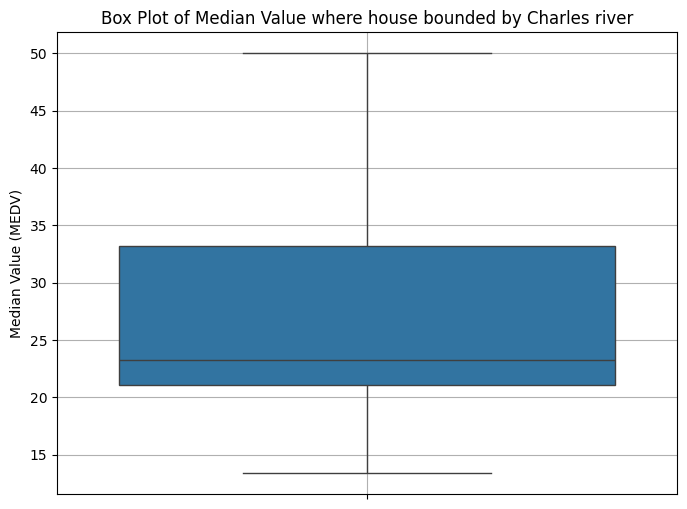

In [6]:
# Filter for Charles River
chas_one_df = boston_df[boston_df['CHAS'] == 1]
# Create Boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=chas_one_df['MEDV'])
pyplot.title('Box Plot of Median Value where house bounded by Charles river')
pyplot.ylabel('Median Value (MEDV)')
pyplot.grid(True)
pyplot.show()

In [7]:
# Perform independent t-test samples
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=np.float64(3.996437466090509), pvalue=np.float64(7.390623170519905e-05), df=np.float64(504.0))

In [8]:
# Interpret results
# as p_value < 0.05:
# We reject the null hypothesis
# There is a statistically significant difference in the median value of houses bound by the Charles river

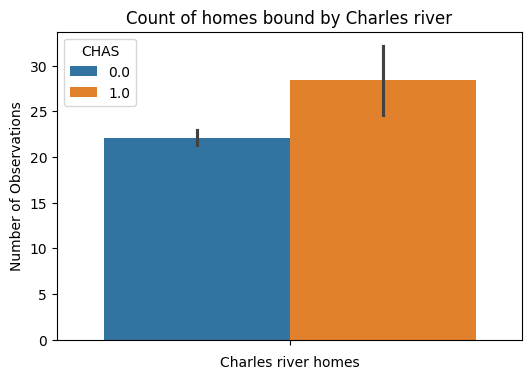

In [9]:
# Create bar plot
chas_rows = len(chas_one_df) # Total number of rows where CHAS=1
pyplot.figure(figsize=(6, 4))
cr = sns.barplot(data=boston_df,y='MEDV', hue = 'CHAS')
cr.set_title('Count of homes bound by Charles river')
cr.set_xlabel('Charles river homes')
cr.set_ylabel('Number of Observations')
pyplot.show()

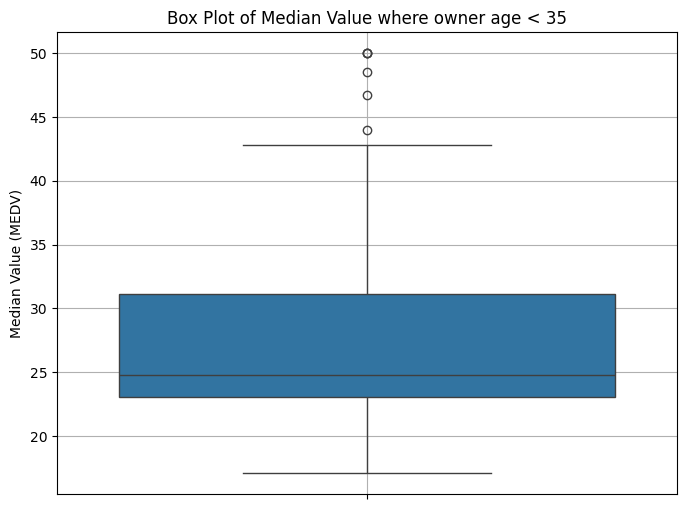

In [10]:
# Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
Age35 = boston_df[boston_df['AGE'] <= 35.0]
# Create Boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=Age35['MEDV'])
pyplot.title('Box Plot of Median Value where owner age < 35')
pyplot.ylabel('Median Value (MEDV)')
pyplot.grid(True)
pyplot.show()

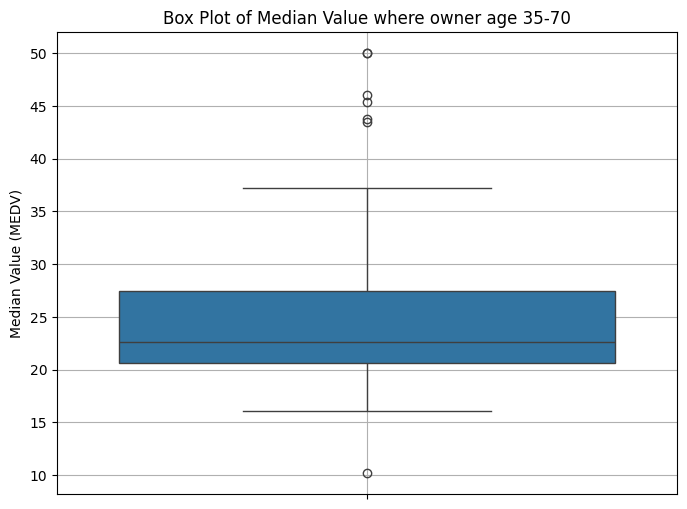

In [11]:
Age70 = boston_df[(boston_df['AGE'] >= 35.0) & (boston_df['AGE'] <= 70.0)]
# Create Boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=Age70['MEDV'])
pyplot.title('Box Plot of Median Value where owner age 35-70')
pyplot.ylabel('Median Value (MEDV)')
pyplot.grid(True)
pyplot.show()

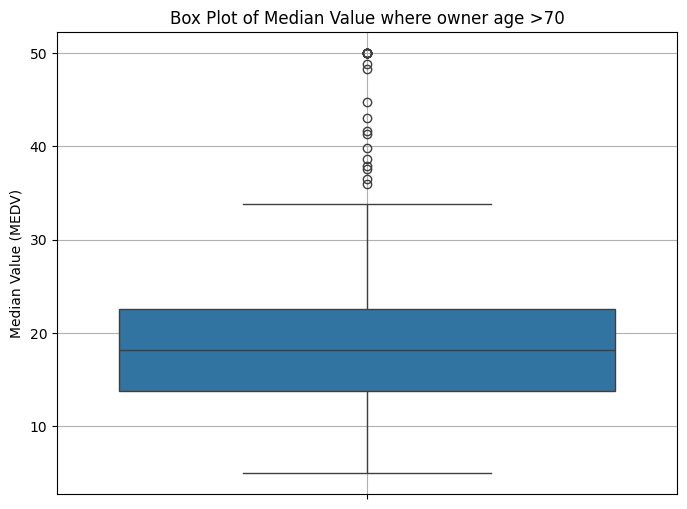

In [12]:
AgeUpper = boston_df[boston_df['AGE'] >= 70.0]
# Create Boxplot
pyplot.figure(figsize=(8, 6))
sns.boxplot(y=AgeUpper['MEDV'])
pyplot.title('Box Plot of Median Value where owner age >70')
pyplot.ylabel('Median Value (MEDV)')
pyplot.grid(True)
pyplot.show()

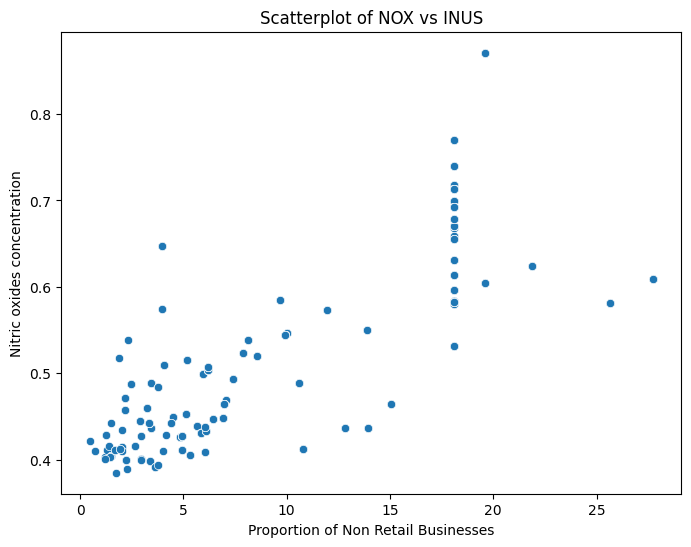

In [13]:
# Create Scatter Plot
pyplot.figure(figsize=(8, 6))
ni = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
ni.set_xlabel('Proportion of Non Retail Businesses')
ni.set_ylabel ('Nitric oxides concentration')
ni.set_title('Scatterplot of NOX vs INUS')
pyplot.show()

In [14]:
scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241112e-98))

In [15]:
# Interpret results
# null hypothesis = there is no correlation between the Nitric oxide concentrations and proportion of non-retail business acres per town
# as p_value < 0.05:
# We reject the null hypothesis
# There is a statistically correlation between the Nitric oxide concentrations and proportion of non-retail business acres per town

In [20]:
#X_weighted = boston_df [[AGE', 'DIS', 'Weighted_DIS']]
 
x = boston_df[['AGE', 'DIS']]
y = boston_df['MEDV']
 
## add an intercept (beta_0) to our model
X = sm.add_constant(x) 
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
 
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     42.45
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           9.20e-18
Time:                        17:06:01   Log-Likelihood:                -1800.8
No. Observations:                 506   AIC:                             3608.
Df Residuals:                     503   BIC:                             3620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3982      2.299     14.526      0.000      28.881      37.915
AGE           -0.1409      0.020     -6.941      0.000      -0.181      -0.101
DIS           -0.3170      0.271     -1.168      0.243      -0.850       0.216
==============================================================================
Omnibus:                      165.209   Durbin-Watson:                   0.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.345
Skew:                           1.633   Prob(JB):                     7.95e-95
Kurtosis:                       6.145   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Null hypothesis: weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes
# Conclusion: Like the t-test, the p-value is less than the alpha (α) level = 0.05,
# We reject the null hypothesis as there is evidence that there is a difference in median value of owner occupied homes based on employment centre distances.
# The coefficients -0.1409  (Owner Occupied) and -0.3170 (Employment Centre Distance) means that houses are valued lower.